In [1]:
import pandas as pd

In [63]:
df = pd.read_csv("jre.csv")
df = df.drop(columns=["Unnamed: 0"])
df = df[df["pod_num"].str.find("MMA") == -1]

In [64]:
df.head(5)

,pod_num,guest,guest_desc,transcript,date
0,1104,Boyan Slat,"Boyan Slat is an inventor, entrepreneur and fo...","Ladies and gentlemen, welcome to the show. Ho...","April 16, 2018"
1,1105,Michael Hunter,Michael Hunter is the chef and owner of Antler...,"Hey everybody, how the fuck are ya? Huh? Huh?...","April 17, 2018"
2,1106,Colion Noir,"Colion Noir is a gun rights activist, lawyer, ...",hey ladies gentlemen how's the thing this epi...,"April 18, 2018"
3,1107,Sam Harris & Maajid Nawaz,Sam Harris is a neuroscientist and author of t...,hey you friends what's going on this episode ...,"April 18, 2018"
4,1108,Peter Attia,Peter Attia is is the founder of Attia Medical...,late and gentlemen how's everyone doing I'm d...,"April 24, 2018"


In [65]:
len(df)

277

## Guests

In [66]:
guests = df.groupby("guest").size()
reocurring_guests = guests.where(guests > 1).dropna()
reocurring_guests.sort_values(ascending=False)

guest
Tom Papa              5.0
Tim Dillon            4.0
Mike Baker            4.0
Tony Hinchcliffe      3.0
Lex Fridman           3.0
Theo Von              3.0
Duncan Trussell       3.0
Joey Diaz             3.0
Tom Green             2.0
Tim Pool              2.0
Tim Kennedy           2.0
Steven Rinella        2.0
Peter Schiff          2.0
Nikki Glaser          2.0
Mike Tyson            2.0
Andrew Santino        2.0
Andrew Schulz         2.0
Jordan Peterson       2.0
Gad Saad              2.0
Dr. Rhonda Patrick    2.0
Dr. Debra Soh         2.0
Donnell Rawlings      2.0
Colion Noir           2.0
Cameron Hanes         2.0
Brian Redban          2.0
Bill Burr             2.0
Ben Greenfield        2.0
Kyle Dunnigan         2.0
dtype: float64

## Greetings

In [83]:
def get_type(s):
    types = ["comedian", "author", "athlete", "Professor", "entrepreneur", "journalist", "founder", "singer"]
    for t in types:
        if t.lower() in s.lower():
            return t.lower()
    return "other"
df["guest_type"] = df["guest_desc"].apply(get_type)

<AxesSubplot:xlabel='guest_type'>

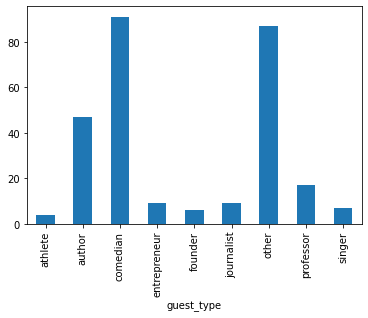

In [84]:
df.groupby("guest_type").size().plot.bar()

In [85]:
df[df["guest_type"] == "other"]

,pod_num,guest,guest_desc,transcript,date,guest_type
1,1105,Michael Hunter,Michael Hunter is the chef and owner of Antler...,"Hey everybody, how the fuck are ya? Huh? Huh?...","April 17, 2018",other
2,1106,Colion Noir,"Colion Noir is a gun rights activist, lawyer, ...",hey ladies gentlemen how's the thing this epi...,"April 18, 2018",other
11,1115,Mike Baker,Mike Baker is a former CIA covert operations o...,hey what's up everybody I just announced show...,"May 9, 2018",other
13,1117,Tim Kennedy,"Tim Kennedy is a Ranger, sniper, Special Force...",ladies and gentlemen how the fuck is everybod...,"May 17, 2018",other
18,1122,Donnie Vincent,"Donnie Vincent is a biologist, explorer, conse...",hey ladies and gentlemen how's everybody doin...,"May 29, 2018",other
...,...,...,...,...,...,...
256,1552,Matthew McConaughey,\nMatthew McConaughey is an Academy Award-winn...,"Hello, friends, welcome to the show. This epi...","October 22, 2020",other
258,1554,Kanye West,"\nKanye West is a rapper, record producer, fas...","Hello, friends, welcome to the show, this epi...","October 24, 2020",other
262,1558,Tristan Harris,\nFormer Google Design Ethicist Tristan Harris...,"Hello, friends, welcome to the show, this epi...","October 30, 2020",other
275,1571,Emily Harrington,\nRock climber and adventurer Emily Harrington...,"Hello, friends, welcome to the show, this epi...","November 27, 2020",other


In [6]:
def get_greeting(greeting):
    if "gentlemen" in greeting or "ladies" in greeting:
        return "ladies and gentlemen"
    elif "friends" in greeting:
        return "friends"
    elif "everybody" in greeting:
        return "everybody"
    elif "folks" in greeting:
        return "folks"
    else:
        return "other"

In [7]:
df["greeting"] = df["transcript"].str[:50]
df["greeting_name"] = df["greeting"].apply(get_greeting)

<AxesSubplot:xlabel='greeting_name'>

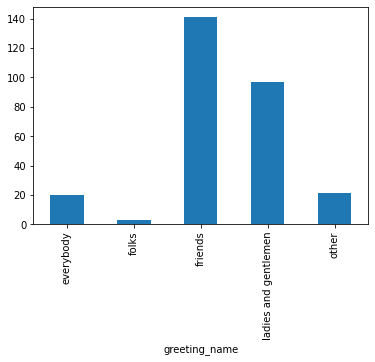

In [8]:
df.groupby("greeting_name").size().plot.bar()

In [9]:
df[df["greeting"].str.contains("motherfuking")]["greeting"]

7       this episode of the motherfuking podcast my c...
89      this episode of the motherfuking pop. Brought...
91      this episode of the motherfuking podcast is b...
102     it's the day before motherfuking Thanksgiving...
Name: greeting, dtype: object

In [10]:
for greeting in df[df["greeting_name"] == "other"]["greeting"]:
    print(greeting)

 this episode is brought to you by Onnit most of t
 this episode of the motherfuking podcast my compa
 Yo Boise Idaho we're coming to town baby! June 30
 I'm taking this show on the Madison area I can't 
 beautiful people of the world hi how you doing go
 he you fuckers Toronto oh shit Toronto coming in 
 hey Boise Idaho and other people but I'm going to
 hey buddy I got a bunch of tour dates coming up a
 I'm going to Tucson on Friday in Boise on Saturda
 I'm back I had to go I had to take some time off 
 raise in Toronto September 29th I've said this a 
 this episode of the podcast is brought to you by 
 this episode of the podcast is brought to you by 
 Netflix You Beautiful bastards Joey Diaz specials
 this episode of the motherfuking pop. Brought to 
 this episode of the motherfuking podcast is broug
 it's the day before motherfuking Thanksgiving and
 this episode of the podcast is brought to you by 
 Bishop so the podcast is brought to you by Square
   they  fit like designer jean

### TODO
- always compare results across different data sets, with/without ads, spell check, etc
- create df run spell check to correct speech to text errors
- create df without ads in transcripts
- cluster: by guest_desc
- sentiment analysis
- train model on rogan transcript only, predict next response, sentence
- number of offensive sentences, average prob per sentence?

## Profanity

In [11]:
from profanity_check import predict, predict_prob

In [12]:
df["profanity_pred"] = df["transcript"].apply(lambda s: [s]).apply(predict).apply(bool)
df["profanity_prob"] = df["transcript"].apply(lambda s: [s]).apply(predict_prob)

In [13]:
df[["guest","profanity_prob", "profanity_pred"]].sort_values("profanity_prob")

,guest,profanity_prob,profanity_pred
20,Robert Schoch,[0.00019790937154024992],False
247,Brian Muraresku & Graham Hancock,[0.00153465072474582],False
71,Chris Kresser & Dr. Joel Kahn,[0.0017442293476518731],False
112,Sir Roger Penrose,[0.0023878808165375917],False
129,Brian Cox,[0.0026294748018217224],False
...,...,...,...
116,Joey Diaz,[0.9999983703826889],True
44,Andrew Santino,[0.9999990169487569],True
79,Andrew Santino,[0.9999993168867961],True
36,Joey Diaz,[0.9999999105362303],True


<AxesSubplot:xlabel='profanity_pred'>

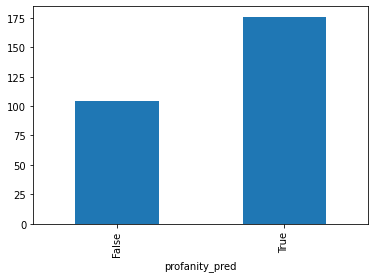

In [33]:
df.groupby("profanity_pred").size().plot.bar()

### Resources
#### Profanity
- https://towardsdatascience.com/building-a-better-profanity-detection-library-with-scikit-learn-3638b2f2c4c2
- https://github.com/vzhou842/profanity-check